### Import libraries

In [1]:
%%capture
!pip install lightgbm --no-warn-script-location
!pip install lazypredict --no-warn-script-location

# import Lazy Predict classification library
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split

# referenced code from [1] - [8] in https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

### Prepare the data set

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize

def resize_all(src, pklname, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})western blot images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    
    # read all images in PATH, resize and write to DESTINATION_PATH
    for file in os.listdir(src):
        img_path = os.path.join(src, file)
        im = imread(img_path)
        im = resize(im, (width, height))
        data['label'].append(img_path[-8:-4])
        data['filename'].append(img_path)
        data['data'].append(im)
 
        joblib.dump(data, pklname)

In [3]:
data_path = r'C:\Users\athenaz2\Documents\Western-Blot-Data\Images'
os.listdir(data_path)

['aTub_Lerit_Lab_2022-07-12_13h11m29s(Chemiluminescence)_mani.png',
 'aTub_Lerit_Lab_2022-07-12_13h11m29s(Chemiluminescence)_orig.png',
 'ECA_mani.png',
 'ECA_orig.png',
 'Figure2C--actin_mani.png',
 'Figure2C--actin_orig.png',
 'Figure2F_CD9+-actin_mani.png',
 'Figure2F_CD9+-actin_orig.png',
 'pone.0237759.s005_1_mani.png',
 'pone.0237759.s005_1_orig.png',
 'pone.0257259.s004_1_mani.png',
 'pone.0257259.s004_1_orig.png',
 'pone.0257259.s004_2_mani.png',
 'pone.0257259.s004_2_orig.png',
 'Raw_images_wetsern_blot_1_mani.png',
 'Raw_images_wetsern_blot_1_orig.png',
 'Raw_images_wetsern_blot_2_mani.png',
 'Raw_images_wetsern_blot_2_orig.png',
 'Raw_images_wetsern_blot_3_mani.png',
 'Raw_images_wetsern_blot_3_orig.png',
 'Raw_images_wetsern_blot_4_mani.png',
 'Raw_images_wetsern_blot_4_orig.png',
 'Raw_images_wetsern_blot_5_mani.png',
 'Raw_images_wetsern_blot_5_orig.png',
 'Raw_images_wetsern_blot_6_mani.png',
 'Raw_images_wetsern_blot_6_orig.png',
 'Raw_images_wetsern_blot_7_mani.png',
 

In [4]:
base_name = 'wb_img'
width = 312 

resize_all(src = data_path, pklname = base_name, width = width)

data = joblib.load(f'{base_name}_{width}x{width}px.pkl')

In [7]:
#print(data['data'][0].shape)

for i in range(0, len(data['data'])):
    if data['data'][i].shape != (312, 312, 3):
        data['data'].remove(data['data'][i])
        
#         x = np.zeros(data['data'][i].shape)
#         result = x[:, :, 3]
        
#         print(result.shape)
                
print(len(data['data']), len(data['data'][0]), len(data['data'][0][0]), len(data['data'][0][0][0]))

28 312 312 3


In [8]:
from collections import Counter
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  28
keys:  ['description', 'label', 'filename', 'data']
description:  resized (312x312)western blot images in rgb
image shape:  (312, 312, 3)
labels: ['mani' 'orig']


Counter({'mani': 24, 'orig': 24})

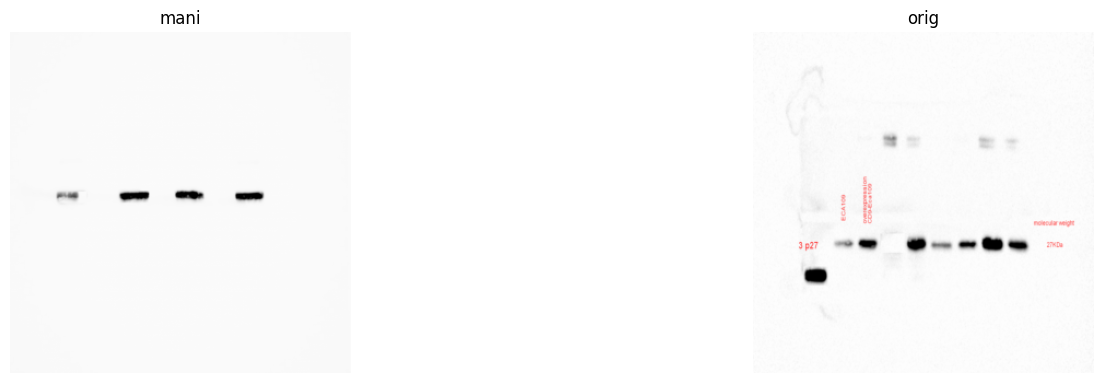

In [9]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [10]:
# input data X
X = np.array(data['data'])
# results (labels)
y = np.array(data['label'])

In [12]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=2,
)

ValueError: Found input variables with inconsistent numbers of samples: [28, 48]